<a href="https://colab.research.google.com/github/nb20593/Fire-and-No-fire-Image-classification/blob/main/Fire_and_No_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## File path

In [1]:
train_dir = "/content/drive/MyDrive/fire/fire_dataset"

## Building the model

In [2]:
# building the model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras


In [3]:
base_model = InceptionV3(input_shape=(256,256,3),include_top = False,)


In [4]:
for layer in base_model.layers:
  layer.trainable = False

In [5]:
x = Flatten()(base_model.output)
# since classes are 2 units will be 2
x = Dense (units = 2, activation = 'sigmoid')(x)
# final model
model = Model(base_model.input, x)
# compile the model
model.compile(optimizer = 'adam',loss =keras.losses.binary_crossentropy,metrics = ["accuracy"])
# summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

## Preprocessing image using data generator

In [6]:
# preprocess the image  using data generator
train_datagen = ImageDataGenerator(featurewise_center= True, 
                                   rotation_range= 0.4, 
                                   width_shift_range=0.3, 
                                   horizontal_flip= True,
                                   preprocessing_function=preprocess_input,
                                   zoom_range=0.4,
                                   shear_range=0.4  )

train_data = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/fire/fire_dataset",
                                               target_size = (256,256),
                                               batch_size = 64)

Found 999 images belonging to 2 classes.


In [7]:
train_data.class_indices

{'fire_images': 0, 'non_fire_images': 1}

## Data visualization

In [8]:
# visualizing the data
t_img,label = train_data.next()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [9]:
t_img.shape

(64, 256, 256, 3)

In [10]:
def plotimages(img_arr,label):
  for idx,img in enumerate(img_arr):
    if idx <= 10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


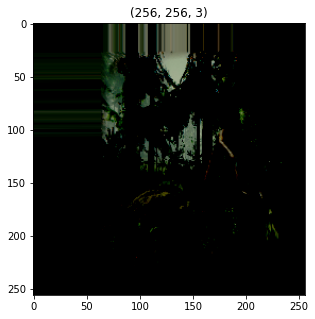

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


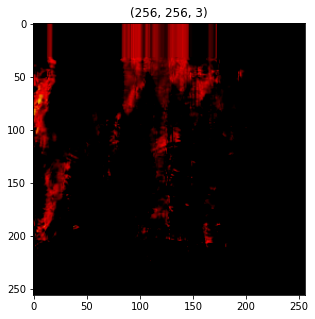

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


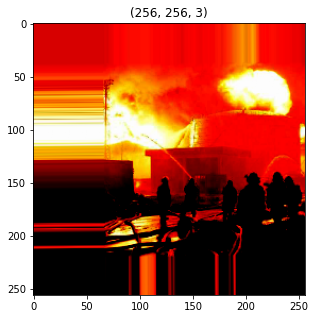

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


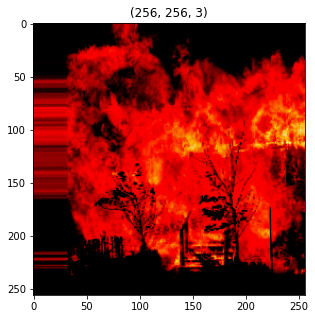

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


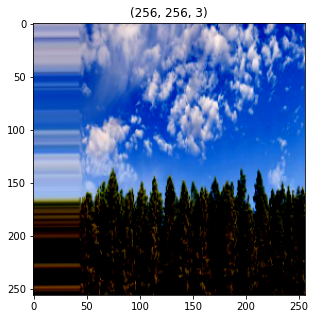

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


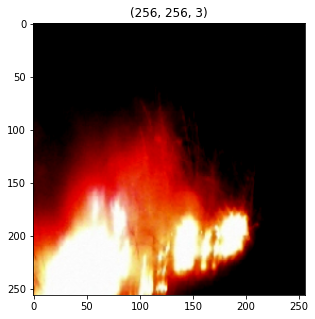

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


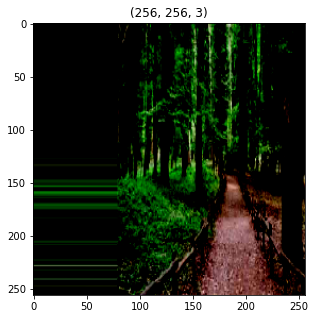

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


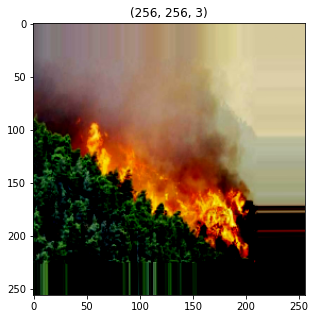

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


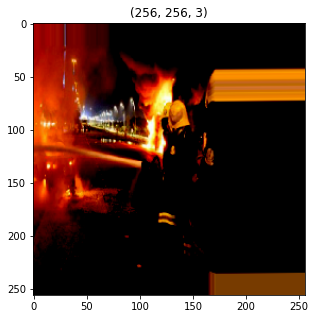

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


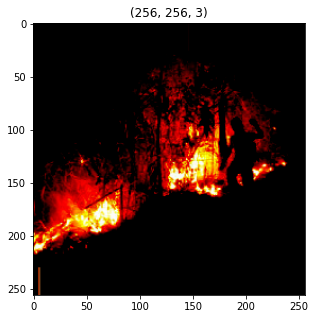

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


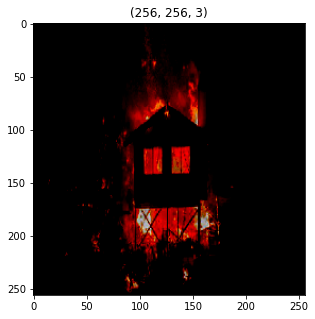

In [11]:
plotimages(t_img,label)

## creating a model check point

In [12]:
# model check point

from keras.callbacks import ModelCheckpoint,EarlyStopping

mc = ModelCheckpoint(filepath = "/content/drive/MyDrive/fire/best_model.h5",
                     monitor = "accuracy",
                     verbose =1,
                     save_best_only = True)
es = EarlyStopping(monitor='accuracy', 
                   min_delta=0.01,
                   patience = 5, 
                   verbose =1)
cb = [mc,es]

## Training model

In [13]:
his = model.fit_generator(train_data,steps_per_epoch=10,epochs=30,callbacks=cb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.8847 - accuracy: 0.8472
Epoch 00001: accuracy improved from -inf to 0.84715, saving model to /content/drive/MyDrive/fire/best_model.h5
10/10 [==============================] - 34s 3s/step - loss: 1.8847 - accuracy: 0.8472
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.4264 - accuracy: 0.9480
Epoch 00002: accuracy improved from 0.84715 to 0.94797, saving model to /content/drive/MyDrive/fire/best_model.h5
10/10 [==============================] - 29s 3s/step - loss: 0.4264 - accuracy: 0.9480
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.2964 - accuracy: 0.9688
Epoch 00003: accuracy improved from 0.94797 to 0.96875, saving model to /content/drive/MyDrive/fire/best_model.h5
10/10 [==============================] - 29s 3s/step - loss: 0.2964 - accuracy: 0.9688
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.3241 - accuracy: 0.9578
Epoch 00004: accuracy di

## model performance

In [15]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/fire/best_model.h5")

In [16]:
h = his.history
h.keys()


dict_keys(['loss', 'accuracy'])

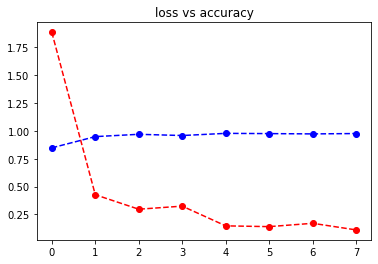

In [21]:
plt.plot(h["loss"], 'go--',c = "red")
plt.plot(h["accuracy"], 'go--', c = 'blue')

plt.title ("loss vs accuracy")
plt.show()

## Test images

In [33]:
import matplotlib.cm as cm
from IPython.display import Image, display
from keras.preprocessing import image

In [38]:

def import_predict (img_path):
  img_array = image.load_img(img_path,target_size=(256,256))
  x = image.img_to_array(img_array)
  x = np.expand_dims(x, axis=0)
  pred = np.argmax(model.predict(preprocess_input(x)))
  print()
  print()
  print()
  if pred == 0 :
    print ("image is fire")
  else:
    print ("image is no_fire")

  a = plt.imread(img_path)
  plt.title("original image")
  plt.imshow(a)
  plt.show()
  print()




image is fire


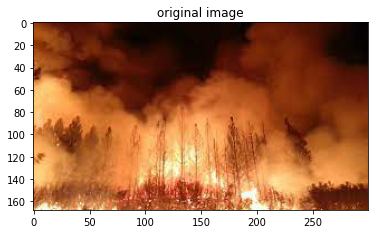

In [39]:
img_path = '/content/download.jfif'
import_predict(img_path)




image is no_fire


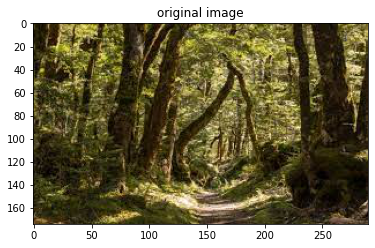

In [40]:
img_path = '/content/download (1).jfif'
import_predict(img_path)